# Examen 1 - Portafolios de inversión - O2018. Tipo 2.

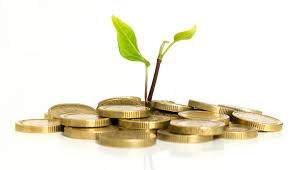

**Resumen.**
> Este examen pretende evaluar los conocimientos que hemos adquirido a lo largo de los dos primeros módulos.

> El examen consta de dos partes. 
1. La primera consiste en demostrar un resultado particular de los que hemos obtenido hasta ahora en el curso. 
2. La segunda parte es práctica, como lo que se ha venido haciendo en las tareas. En esta parte deberás importar un archivo donde se encuentran reportados los precios ajustados en el cierre de compañías en una base mensual, deberás caracterizar los rendimientos y con base en ello construir fronteras media-varianza bajo ciertas condiciones. Finalmente deberás concluir de los resultados.

**Criterio de revisión.**
> Primera parte: tiene un valor del 40% del examen. Para la calificación, tenga en cuenta que se considerará el nivel de detalle de la demostración, la claridad en la redacción de la misma, así como la obtención del resultado en cuestión.

> Segunda parte: tiene un valor del 60% del examen. Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

**Antes de comenzar.**
> Por favor, nombrar este archivo *Examen1_ApellidoNombre*, sin acentos y sin espacios; por ejemplo, en mi caso el archivo se llamaría *Examen1_JimenezEsteban*. Resolver todos los puntos en dicho archivo y subir a moodle.
___

## I. Primera parte (40%)

Sean $A$ y $B$ dos activos cuyos rendimientos están perfectamente **negativamente** correlacionados.

Demuestre, con todo nivel de detalle y claridad, que el espacio geométrico, en el plano de rendimiento esperado vs. volatilidad, de todos los posibles portafolios formados por los activos $A$ y $B$ son un par de segmentos de líneas rectas, uno entre los puntos $A$ y $P$, y otro entre los puntos $P$ y $B$, donde $P$ es un punto sobre el eje de rendimiento esperado (volatilidad igual a cero).

Rúbrica:
1. Definición de todas las variables involucradas en la demostración (10%).
2. Planteamiento correcto de las ecuaciones iniciales (10%).
3. Obtención del resultado (20%).
 - Particularmente, para este resultado deberá llegar a las ecuaciones de las dos rectas en cuestión.

___
## II. Segunda parte (60%)

**Punto 1 (15%).** En los archivos `data_mx.csv` y `data_us.csv` se encuentran reportados los **precios mensuales ajustados en el cierre** de los activos de Grupo Financiero Banorte, Grupo Financiero Inbursa, Grupo Aeroportuario del Pacífico y Herdez, y Microsoft, Apple, Coca-Cola y Nike, respectivamente, desde inicios del 2012 hasta el úlimo mes reportado.

1. Importar los **precios de mensuales** de las compañías <font color=red>americanas</font> en un **DataFrame indizado por fecha** (5%): 
 - Mostrar la gráfica de estos precios.
 - Obtener un DataFrame con los **rendimientos porcentuales mensuales** para estos activos. Mostrar la gráfica de rendimientos.
 
2. Reportar en un **DataFrame el rendimiento esperado mensual y la volatilidad mensual** para cada uno de estos activos. Calcular las matrices de varianza-covarianza (**base mensual**) y de correlación (**base mensual**) para estos activos (5%).

3. De acuerdo a lo obtenido en el punto anterior, elija el par de activos que le ofrezca **la mejor oportunidad para diversificar**. Con estos activos seguirá trabajando en el resto del examen. **Escriba claramente qué activos seleccionó en una celda tipo markdown** (5%).

1. Importar los **precios de mensuales** de las compañías <font color=red>americanas</font> en un **DataFrame indizado por fecha** (5%):

In [21]:
import pandas as pd

In [22]:
closes=pd.read_csv('data_us.csv',index_col='Date')
closes

,AAPL,MSFT,KO,NKE
Date,,,,
2012-01-01,56.606174,24.291142,25.962933,21.686840
2012-02-01,67.265724,26.109074,26.858730,22.506430
2012-03-01,74.347702,26.711521,28.454264,22.614874
2012-04-01,72.416931,26.512798,29.775322,23.645712
2012-05-01,71.641876,24.169538,29.155006,22.865761
...,...,...,...,...
2019-11-01,265.819183,150.455688,53.004078,92.988693
2019-12-01,292.954712,157.270432,55.349998,101.029694
2020-01-01,308.777191,169.766296,58.400002,96.033562


- Mostrar la gráfica de estos precios.

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Closes')

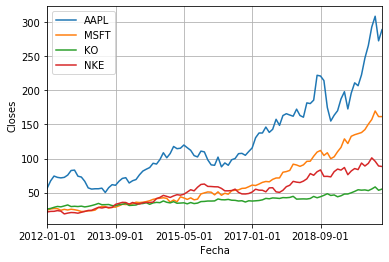

In [24]:
closes[['AAPL','MSFT','KO','NKE']].plot(grid=True)
plt.xlabel('Fecha')
plt.ylabel('Closes')

 - Obtener un DataFrame con los **rendimientos porcentuales mensuales** para estos activos. Mostrar la gráfica de rendimientos.

In [25]:
ret = closes.pct_change().dropna()
ret

,AAPL,MSFT,KO,NKE
Date,,,,
2012-02-01,0.188311,0.074839,0.034503,0.037792
2012-03-01,0.105284,0.023074,0.059405,0.004818
2012-04-01,-0.025969,-0.007440,0.046427,0.045582
2012-05-01,-0.010703,-0.088382,-0.020833,-0.032985
2012-06-01,0.010853,0.054838,0.046300,-0.177672
...,...,...,...,...
2019-11-01,0.074329,0.055870,-0.018923,0.043998
2019-12-01,0.102083,0.045294,0.044259,0.086473
2020-01-01,0.054010,0.079455,0.055104,-0.049452


Text(0, 0.5, 'Rendimientos Porcentuales')

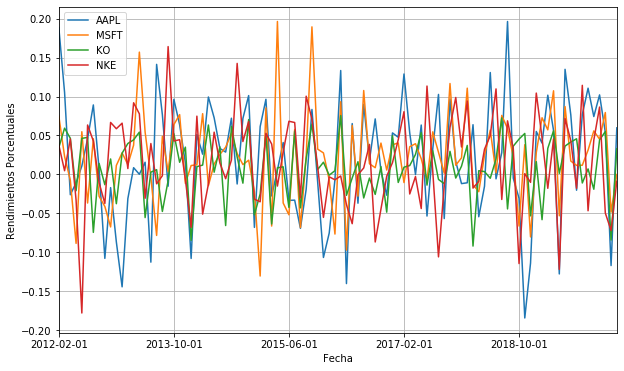

In [26]:
ret.plot(figsize=(10,6),grid=True)
plt.xlabel('Fecha')
plt.ylabel('Rendimientos Porcentuales')

2. Reportar en un **DataFrame el rendimiento esperado mensual y la volatilidad mensual** para cada uno de estos activos. 

In [27]:
ret_summary = pd.DataFrame(data={'Mean':ret.mean(),'Volatility':ret.std()},index=ret.columns)
ret_summary

,Mean,Volatility
AAPL,0.019620,0.075696
MSFT,0.021094,0.056999
KO,0.008509,0.039324
NKE,0.016168,0.059098


Calcular las matrices de varianza-covarianza (**base mensual**) y de correlación (**base mensual**) para estos activos (5%).

In [28]:
cov=ret.cov()
cov

,AAPL,MSFT,KO,NKE
AAPL,0.005730,0.001669,0.000694,0.000801
MSFT,0.001669,0.003249,0.000789,0.000684
KO,0.000694,0.000789,0.001546,0.000315
NKE,0.000801,0.000684,0.000315,0.003493


In [29]:
cor=ret.corr()
cor

,AAPL,MSFT,KO,NKE
AAPL,1.000000,0.386791,0.233265,0.179040
MSFT,0.386791,1.000000,0.352075,0.203167
KO,0.233265,0.352075,1.000000,0.135735
NKE,0.179040,0.203167,0.135735,1.000000


3. De acuerdo a lo obtenido en el punto anterior, elija el par de activos que le ofrezca **la mejor oportunidad para diversificar**. Con estos activos seguirá trabajando en el resto del examen. **Escriba claramente qué activos seleccionó en una celda tipo markdown** (5%).

**RESPUESTA:**

Los dos activos que ofrecen la mejor oportunidad para diversificar son **CocaCola (KO)** y **Nike (NKE)**, ya que son los dos activos menos correlacionados.

**Punto 2 (20%).** Usando los datos que obtuvo para los **activos que seleccionó** en el punto anterior:

1. Construya la frontera de mínima varianza que representa las posibles combinaciones de portafolios que se pueden crear con los activos que **seleccionó en el primer punto**. Reportar los **rendimientos esperados y las volatilidades de estos portafolios (base mensual) en un DataFrame** (10%).

2. Encontrar los pesos del portafolio de mínima varianza. Reportar el **rendimiento esperado mensual y la volatilidad mensual del portafolio de mínima varianza** (10%).

Usaré:

ACTIVO 1 = **KO** 

ACTIVO 2 = **NKE**

In [31]:
import numpy as np

In [35]:
N = 101
w = np.linspace(0,1,N)
E1 = ret_summary.loc['KO','Mean']
E2 = ret_summary.loc['NKE','Mean']

# Volatilidades individuales
s1 = ret_summary.loc['KO','Volatility']
s2 = ret_summary.loc['NKE','Volatility']

# Correlación
r12 = cor.loc['KO','NKE']
E1,E2,s1,s2,r12

(0.00850872142404149,
 0.01616774024887938,
 0.039323804472276465,
 0.05909807657527209,
 0.13573510975402228)

In [36]:
portKN = pd.DataFrame(data={'w':w,'Mean':w*E1+(1-w)*E2,'Volatility':((w*s1)**2+((1-w)*s2)**2+2*w*(1-w)*s1*s2*r12)**0.5})
portKN

,w,Mean,Volatility
0,0.00,0.016168,0.059098
1,0.01,0.016091,0.058562
2,0.02,0.016015,0.058028
3,0.03,0.015938,0.057497
4,0.04,0.015861,0.056969
...,...,...,...
96,0.96,0.008815,0.038144
97,0.97,0.008738,0.038425
98,0.98,0.008662,0.038715
99,0.99,0.008585,0.039015


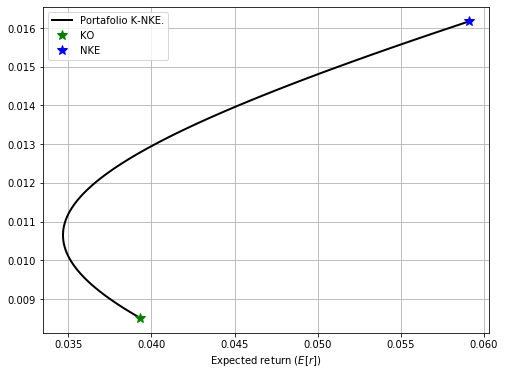

In [59]:
plt.figure(figsize=(8,6))
plt.plot(portKN['Volatility'],portKN['Mean'],'k',lw=2,label='Portafolio K-NKE.')
plt.plot(s1,E1,'g*',ms=10,label='KO')
plt.plot(s2,E2,'b*',ms=10,label='NKE')
plt.xlabel('Volatility ($/sigma$)')
plt.xlabel('Expected return ($E[r]$)')
plt.legend(loc='best')
plt.grid()

2. Encontrar los pesos del portafolio de mínima varianza. Reportar el **rendimiento esperado mensual y la volatilidad mensual del portafolio de mínima varianza** (10%).

In [60]:
import scipy.optimize as opt

In [61]:
def varianza(w,s1, s2, r12):
    return (w*s1)**2 + ((1-w) * s2)**2 + 2 * w * (1-w) * s1 * s2 * r12

In [62]:
w0=0.5
bnd = ((0,1),)

In [63]:
minvar = opt.minimize(fun=varianza,x0=w0,args=(s1,s2,r12),bounds=bnd)
minvar

      fun: array([0.00120264])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([4.11996826e-10])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 6
      nit: 2
   status: 0
  success: True
        x: array([0.72075724])

In [64]:
w1= minvar['x']
w2=1-w1
E_minvar = w1*E1 + (w2)*E2
s_minvar = varianza (w1,s1,s2,r12)**0.5
w2,w1,E_minvar,s_minvar

(array([0.27924276]),
 array([0.72075724]),
 array([0.01064745]),
 array([0.03467905]))

**Respuesta:** 

El portafolio de mínima varianza se compone aproximadamente de **27.92%** de acciones de **CocaCola** y **72.08%** de acciones de **Nike**. El **rendimiento esperado** de este portafolio es de **1.06%** con una **volatilidad** de **3.47%.**

**Punto 3 (15%).** En este punto se usarán los mismos **activos que seleccionó** en el punto 1 con sus rendimientos esperados y volatilidades, solo que **el coeficiente de correlación entre sus rendimientos se supondrá de 0.5**.

1. Nuevamente, construya la frontera de mínima varianza para estos dos activos **con el nuevo supuesto de correlación**. Reportar **los rendimientos esperados y las volatilidades de estos portafolios en un DataFrame** (8%).
2. Encontrar los pesos del portafolio de mínima varianza. Reportar el **rendimiento esperado mensual y la volatilidad mensual del portafolio de mínima varianza** (7%).

In [65]:
R12=0.5

In [66]:
portKN2 = pd.DataFrame(data={'w':w,'Mean':w*E1+(1-w)*E2,'Volatility':((w*s1)**2+((1-w)*s2)**2+2*w*(1-w)*s1*s2*R12)**0.5})
portKN2

,w,Mean,Volatility
0,0.00,0.016168,0.059098
1,0.01,0.016091,0.058705
2,0.02,0.016015,0.058313
3,0.03,0.015938,0.057924
4,0.04,0.015861,0.057537
...,...,...,...
96,0.96,0.008815,0.038987
97,0.97,0.008738,0.039061
98,0.98,0.008662,0.039142
99,0.99,0.008585,0.039229


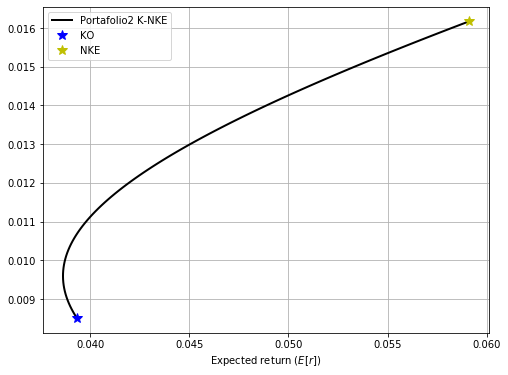

In [67]:
plt.figure(figsize=(8,6))
plt.plot(portKN2['Volatility'],portKN2['Mean'],'k',lw=2,label='Portafolio2 K-NKE')
plt.plot(s1,E1,'b*',ms=10,label='KO')
plt.plot(s2,E2,'y*',ms=10,label='NKE')
plt.xlabel('Volatility ($/sigma$)')
plt.xlabel('Expected return ($E[r]$)')
plt.legend(loc='best')
plt.grid()

In [68]:
minvar2 = opt.minimize(fun=varianza,x0=w0,args=(s1,s2,R12),bounds=bnd)
minvar2

      fun: array([0.00149194])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-3.88144378e-09])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 6
      nit: 2
   status: 0
  success: True
        x: array([0.8584216])

In [69]:
W1= minvar2['x']
W2=1-W1
E_minvar2 = W1*E1 + (W2)*E2
s_minvar2 = varianza (W1,s1,s2,R12)**0.5
W1,W2,E_minvar2,s_minvar2

(array([0.8584216]),
 array([0.1415784]),
 array([0.00959307]),
 array([0.03862566]))

**Respuesta:**

El portafolio de mínima varianza se compone aproximadamente de **85.84%** de acciones de **CocaCola** y **14.16%** de acciones de **Nike**. El **rendimiento esperado** de este portafolio es de **0.96%** con una **volatilidad** de **3.86%**.

**Punto 4 (10%).** 

1. Usando sus respuestas para los puntos 2 y 3, **grafique las dos fronteras encontradas en una sola gráfica**, además de los puntos correspondientes a los activos individuales, y de **los portafolios de mínima varianza para cada caso**, donde el eje $x$ es la volatilidad y el eje $y$ el rendimiento esperado. Asegúrese de etiquetar todo y poner distintos colores para diferenciar los distintos elementos en su gráfico (5%).
2. Concluya acerca de la gráfica de las dos fronteras de mínima varianza. ¿Cuál provee más diversificación?, ¿cómo se diferencian?, **¿son diferentes los pesos de los dos portafolios de varianza mínima en cada caso?**, **¿cómo puede explicar esta diferencia/similitud?** (5%).

Text(0, 0.5, 'Rendimiento esperado ($E[r]$)')

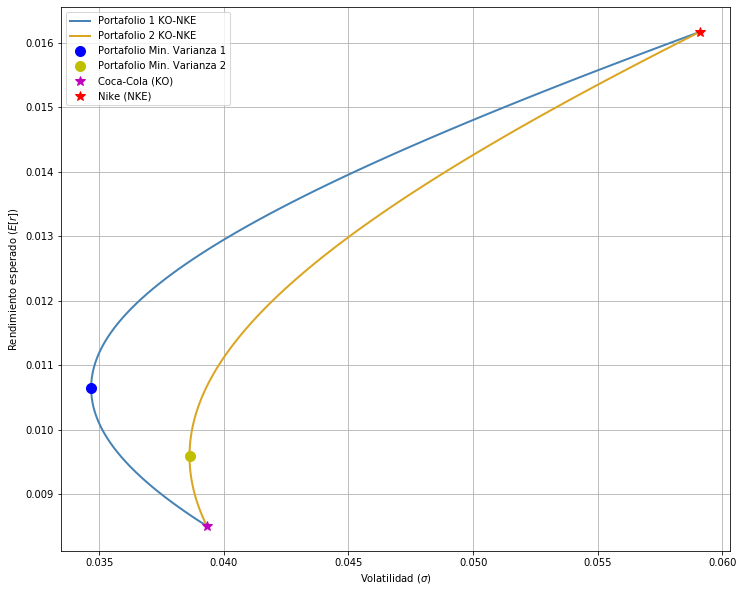

In [76]:
plt.figure(figsize=(12,10))
plt.plot(portKN['Volatility'], portKN['Mean'], 'steelblue',lw=2, label='Portafolio 1 KO-NKE')
plt.plot(portKN2['Volatility'], portKN2['Mean'], 'goldenrod',lw=2, label='Portafolio 2 KO-NKE')
plt.plot(s_minvar, E_minvar, 'ob', ms=10, label='Portafolio Min. Varianza 1')
plt.plot(s_minvar2, E_minvar2, 'oy', ms=10, label='Portafolio Min. Varianza 2')
plt.plot(s1,E1,'m*',ms=10,label='Coca-Cola (KO)')
plt.plot(s2,E2,'r*',ms=10,label='Nike (NKE)')
plt.grid()
plt.legend()
plt.xlabel('Volatilidad ($\sigma$)')
plt.ylabel('Rendimiento esperado ($E[r]$)')

**CONCLUSIÓN:** 

Se puede observar que el primer portafolio (color azul) está más diversificado ya que los activos tenían una correlación menor.
Si observamos el portafolio de mínima varianza de las dso fronteras, se ve cómo es que en el primer portafolio obtenemos MAYOR rendimiento con un MENOR riesgo, lo que nos señala que está mejor diversificado.

Los pesos de los portafolios de mínima varianza tienen diferencias en ambas fronteras, en el portafolio 1 predominan las acciones de NIKE mientras que en el portafolio 2 predominan las de COCA-COLA, están invertidos, esto es porque al estar más correlacionados, la concavidad de la frontera es menos predominante, por lo que los pesos son totalmente diferentes.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>